<a href="https://colab.research.google.com/github/enriqueasegura/Exercises/blob/master/HW1_PH_4200.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import astropy
from google.colab import files

import matplotlib
"""
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf -P /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf

matplotlib.font_manager._rebuild()
matplotlib.rc('font', family='TH Sarabun New')

"""
%matplotlib inline


Assignment done by Enrique Segura

1. Write a code that takes as input an employee's hourly rate (say \$20 per hour) and the number of hours worked per month (around 200). 
The program should calculate the gross and net pay. For the net pay, assume a federal tax of 15%, state tax of 5%, social security of 5%, and medical insurance of $200 per month.


In [0]:
employee_hr_rate = float(input('Please enter your hourly rate: '))
num_hrs_worked_per_month =  float(input('Please enter your total number of hours worked: '))
#print(employee_hr_rate, num_hrs_worked_per_month)
gross_pay = employee_hr_rate * num_hrs_worked_per_month

print('Gross Pay is: ', gross_pay, ' dollars.')

Please enter your hourly rate: 20
Please enter your total number of hours worked: 200
Gross Pay is:  4000.0  dollars.


In [0]:
medical_insurance_monthly_cost = 200

fed_tax_fraction = .15 * gross_pay

state_tax_fraction = .05 * gross_pay

social_security_fraction = .05 * gross_pay 

print('Deductions: ', 'Federal Taxes: ', fed_tax_fraction, ' dollars ,', 'State Taxes: ', state_tax_fraction, ' dollars, ', 'Social Security: ', social_security_fraction, ' dollars, ', 'Medical Insurance: ', medical_insurance_monthly_cost, 'dollars.')


Deductions:  Federal Taxes:  600.0  dollars , State Taxes:  200.0  dollars,  Social Security:  200.0  dollars,  Medical Insurance:  200 dollars.


In [0]:

net_pay = gross_pay - fed_tax_fraction - state_tax_fraction - social_security_fraction - medical_insurance_monthly_cost
print('Net Pay is: ', net_pay, ' dollars.')


Net Pay is:  2800.0  dollars.


2. A ball is shot upward from the ground with an initial velocity v0 (entered by the user as an input). Write a program that calculates the time when the ball is at some altitude h (again entered by the user as an input). Test different values of h, ones that produce two values for the time, and ones that produce no real value for the time.

Formula Used:

$h = v_{i,y}t - \frac{1}{2}gt^2$

$t^2 - \frac{2v_{i,y} t}{g} + \frac{2h}{g} = 0$ 

Yielding: 
$\Delta =  (\frac{2v_{i,y}}{g})^2 - 4 (\frac{2h}{g})$

$t_{1,2} =  \frac{1}{2}(\frac{2v_{i,y}}{g} \pm \sqrt{\Delta}) $

Also, remember time of flight and max height:

$t = \frac{2v_{i,y}}{g}$

$h_{max} = \frac{v_0^2 \sin^2(\theta)}{2g} $

So, make sure your inputs are physically significant

In [0]:
import scipy.constants 
g = scipy.constants.g

In [0]:

initial_velocity = float(input('Please enter measured initial velocity of projectile: '))

max_height = np.divide(np.square(initial_velocity), 2*g)
time_flight = np.divide(2*initial_velocity, g)

requested_h = float(input('Please enter desired altitude: '))

if max_height < requested_h:
  print('Please try again with a number below the max height of this trajectory, ', max_height, ' mts!')
  print('time of flight: ', time_flight)
  print('max height: ', max_height )
else:
  #Let's get the roots of the quadratic equation we have laid out above

  coefs_time_quad = [1, np.divide(-2*initial_velocity, g), np.divide(2*requested_h,g)]

  current_quadratic = np.poly1d(coefs_time_quad)

  #solve roots

  roots_quad = current_quadratic.r
  print('Time at Request H: ')
  print(roots_quad)


Please enter measured initial velocity of projectile: 275
Please enter desired altitude: 1500
Time at Request H: 
[49.96136292  6.1230288 ]


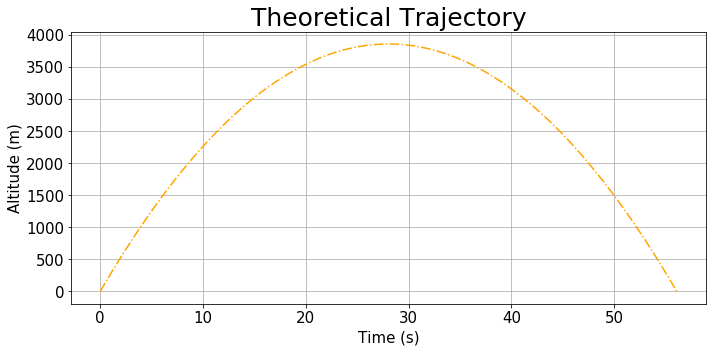

In [0]:
#test of sanity using standard physics 


t = np.arange(0, time_flight, 0.01)
x = initial_velocity*t
h = initial_velocity*t - .5*g*np.square(t)

plt.figure(figsize=(10,5))

plt.plot(t, h, color='orange', linestyle='-.')

plt.xlabel('Time (s)', fontsize=15)
plt.ylabel('Altitude (m)', fontsize=15)
plt.title('Theoretical Trajectory', fontsize=25)

plt.tick_params(axis='both',labelsize=15)
plt.tight_layout()

plt.subplots_adjust(top=.9)

plt.grid()

3. An RC DC-circuit has its switch closed at time t = 0. Prompt the user to enter the values of the battery voltage V in volts, the resistance R in Ohms, and the capacitance C in microfarads. Convert the capacitance to C in Farads. Using matplotlib, make a plot of the current versus time for times up to 10RC. The current is given by I(t) = (V/R) exp(-t/RC).

In [0]:
input_V = float(input('Please enter battery voltage in volts: '))
input_R = float(input('Please enter resistance in Ohms: '))
input_C = float(input('Please enter capacitance in microfarads: '))
#convert this to farads so units don't become a problem, so adjust by 10^-6 
input_C = input_C * 10**-6 

time_limit = 10*input_R*input_C

Please enter battery voltage in volts: 1000
Please enter resistance in Ohms: 100
Please enter capacitance in microfarads: 10


In [0]:
time_arr = np.linspace(0, time_limit,1000)

tau = np.multiply(input_R, input_C)
current = np.multiply(np.divide(input_V, input_R), np.exp(np.divide(-time_arr, tau)))

No handles with labels found to put in legend.


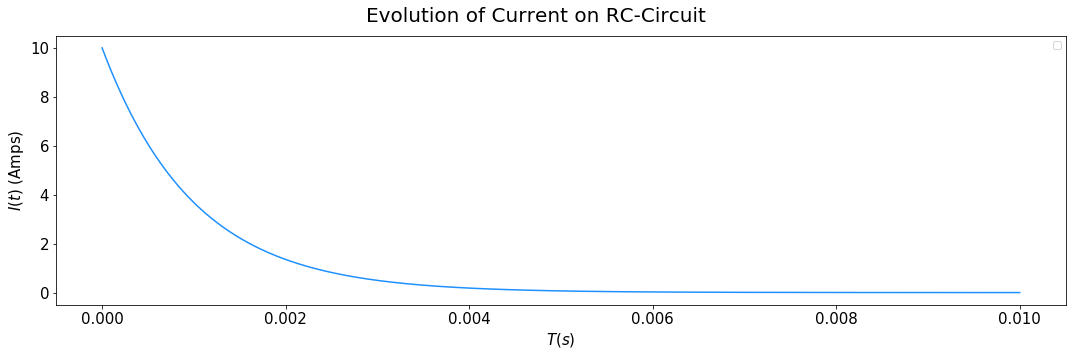

In [0]:
f1 = plt.figure(figsize=(15,5))

plt.plot(time_arr, current, color='dodgerblue', linestyle='-')
#plt.fill_between(time_arr, curr_integral, 0.001, where=(curr_integral > .001), facecolor='g', alpha=0.6)
plt.ylabel(r'$I(t)$ (Amps)', fontsize=15)
plt.xlabel(r'$T (s) $', fontsize=15)

plt.legend(loc='best')


plt.suptitle('Evolution of Current on RC-Circuit', fontsize=20)

plt.tick_params(axis='both',labelsize=15)
plt.tight_layout()

plt.subplots_adjust(top=.9)

4. Construct a list that contains the integers starting at 1 all the way to 100 in steps of 9. So the list must have the numbers 1, 10, 19, 28, ... 100.
5. Using a while loop, print out the numbers. 
6. Repeat using a for loop.

In [0]:
#First, the for-loop because it is easier with python
num_l = []
for i in range(1, 101, 9):
  print(i)
  num_l.append(i)

1
10
19
28
37
46
55
64
73
82
91
100


In [0]:
print('list of numbers via for-loop: ', num_l)

list of numbers via for-loop:  [1, 10, 19, 28, 37, 46, 55, 64, 73, 82, 91, 100]


In [0]:
#Then the while-loop because it's somewhat cumbersome
wl_num_list = []
max_number = 100
count = 1
while count < max_number+1:
  print(count)
  wl_num_list.append(count)
  count += 9

1
10
19
28
37
46
55
64
73
82
91
100


In [0]:
print('list of numbers via while-loop: ', wl_num_list)

list of numbers via while-loop:  [1, 10, 19, 28, 37, 46, 55, 64, 73, 82, 91, 100]


5. The integral of f(x) from a to b is the sum of f(x_i)dx. Calculate the integral of f(x) = 3x^2 from 0 to 1. Subdivide the interval from 0 to 1 into N equal divisions. Take N = 10, 20, 30, 40, 50, ...., 1000. Using matplotlib, make a plot of the error (the exact answer is 1) versus N.

In [0]:
def f(x):
  return 3*np.square(x)

In [0]:
def int_f(arr):
  return np.sum(f(arr))

In [0]:
#this is the array of step sizes you need to calculate this integral using I guess a form of trapezoidal rule or someethihg
N_arr = np.arange(10,1000+10,10)
#N_arr

In [0]:
int_result_arr =[]
for i in N_arr:
  curr_integral = int_f(np.linspace(0,1,i))
  #print(i, curr_integral/ i)
  int_result_arr.append(1 - np.divide(curr_integral, i))

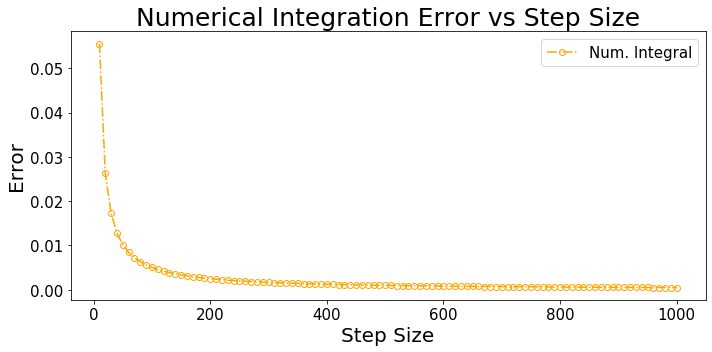

In [0]:
plt.figure(figsize=(10,5))

plt.plot(N_arr, np.abs(int_result_arr), linestyle='-.', color='orange',marker='o',markerfacecolor='none', label='Num. Integral')

plt.legend(loc='best', fontsize=15)
plt.tick_params(axis='both',labelsize=15)

plt.xlabel(r'Step Size', fontsize=20)
plt.ylabel('Error', fontsize=20)

plt.title('Numerical Integration Error vs Step Size',fontsize=25)

plt.tight_layout()


6. Write a code that prints out the current time in hrs:mins:secs. You need to import the time module (import time). The function time.time() yields the time in seconds since Jan 1, 12 am, 1970; i.e., it yields what is known as the epoch time (GMT). Convert to Pacific Standard time.

In [0]:
import time
import os
from time import gmtime, strftime
from datetime import datetime
from pytz import timezone
import pytz

In [0]:
date = datetime.now(tz=pytz.utc)
date_format='%H:%M:%S %Z'

date = date.astimezone(timezone('US/Pacific'))

print('Local date & time is  :', date.strftime(date_format))

Local date & time is  : 09:18:18 PST
